In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Generate polynomial data

In [140]:
np.random.seed(42)
m = 200
m_train = m // 5 * 4
print("(m, m_train) = (%d, %d)" % (m, m_train))
# Input
X_data = 10 * np.random.rand(m, 1) - 5 # Note: X is randomly sampled, so we don't need to shuffle the data again

# Output
is_multiout = True
# is_multiout = False
if is_multiout:
    m_h = m // 2
    X_data_1 = X_data[:m_h]
    X_data_2 = X_data[m_h:]
    y_data_pure_1 = 0.5 * X_data_1**3 + 0.5 * X_data_1**2 + X_data_1 + 2 
#     y_data_pure_2 = 0.5 * X_data_2**3 + 0.5 * X_data_2**2 + X_data_2 + 30 
#     y_data_pure_2 = -0.5 * X_data_2**3 + 0.5 * X_data_2**2 + X_data_2 + 30 
    y_data_pure_2 = 0.3 * X_data_2**3 + 1.0 * X_data_2**2 + X_data_2 + 15 
    y_data_pure = np.vstack([y_data_pure_1, y_data_pure_2])
    print("y_data_pure.shape = %s" % str(y_data_pure.shape))
else:        
    y_data_pure = 0.5 * X_data**3 + 0.5 * X_data**2 + X_data + 2 

# Label (+noise)
n_stddev = 2.0
# n_stddev = 10.0
y_data = y_data_pure + np.random.randn(m, 1) * n_stddev
print("y_data.shape = %s" % str(y_data.shape))

(m, m_train) = (200, 160)
y_data_pure.shape = (200, 1)
y_data.shape = (200, 1)


In [141]:
X_train = X_data[:m_train]
y_train = y_data[:m_train]
X_valid = X_data[m_train:]
y_valid = y_data[m_train:]

In [142]:
print(X_train.shape)

(160, 1)


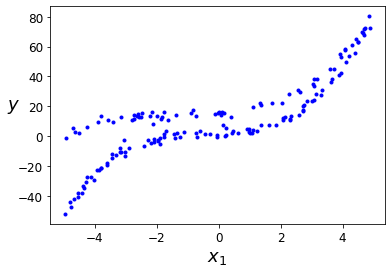

In [143]:
plt.plot(X_train, y_train, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([-3, 3, 0, 10])
plt.show()

Build the regression model

In [144]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(loss="mean_squared_error", optimizer=optimizer)

/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [7]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
5/5 [==============================] - 1s 109ms/step - loss: 1060.0938 - val_loss: 833.0353
Epoch 2/100
5/5 [==============================] - 0s 29ms/step - loss: 612.3378 - val_loss: 1668.2145
Epoch 3/100
5/5 [==============================] - 0s 34ms/step - loss: 1099.5511 - val_loss: 1800.4291
Epoch 4/100
5/5 [==============================] - 0s 33ms/step - loss: 1064.6842 - val_loss: 1532.9114
Epoch 5/100
5/5 [==============================] - 0s 32ms/step - loss: 811.0681 - val_loss: 268.2087
Epoch 6/100
5/5 [==============================] - 0s 45ms/step - loss: 554.3594 - val_loss: 1053.1094
Epoch 7/100
5/5 [==============================] - 0s 53ms/step - loss: 488.8792 - val_loss: 147.2755
Epoch 8/100
5/5 [==============================] - 0s 56ms/step - loss: 416.5842 - val_loss: 255.1042
Epoch 9/100
5/5 [==============================] - 0s 44ms/step - loss: 356.0155 - val_loss: 679.4897
Epoch 10/100
5/5 [==============================] - 0s 39ms/step - loss: 3

5/5 [==============================] - 0s 67ms/step - loss: 216.9287 - val_loss: 316.2497
Epoch 81/100
5/5 [==============================] - 0s 47ms/step - loss: 254.4029 - val_loss: 364.5399
Epoch 82/100
5/5 [==============================] - 0s 62ms/step - loss: 222.7265 - val_loss: 206.8245
Epoch 83/100
5/5 [==============================] - 0s 57ms/step - loss: 239.9630 - val_loss: 325.7091
Epoch 84/100
5/5 [==============================] - 0s 35ms/step - loss: 211.6805 - val_loss: 330.9869
Epoch 85/100
5/5 [==============================] - 0s 36ms/step - loss: 206.8154 - val_loss: 259.1413
Epoch 86/100
5/5 [==============================] - 0s 33ms/step - loss: 180.7766 - val_loss: 357.5779
Epoch 87/100
5/5 [==============================] - 0s 37ms/step - loss: 185.1300 - val_loss: 323.1285
Epoch 88/100
5/5 [==============================] - 0s 39ms/step - loss: 187.5810 - val_loss: 264.9623
Epoch 89/100
5/5 [==============================] - 0s 45ms/step - loss: 220.7172 - va

Plot the result

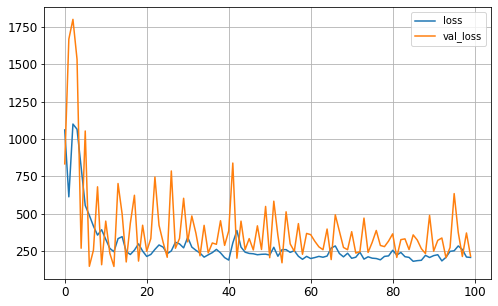

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.show()

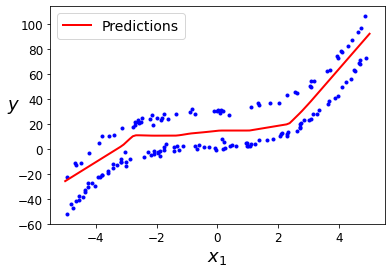

In [9]:
X_new = np.linspace(-5, 5, 100).reshape(100, 1)
y_new = model.predict(X_new)
#
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
# plt.axis([-3, 3, 0, 10])
plt.show()

# Simulated CNN Feature Map (1-D, grids)

In [10]:
class num2grid(keras.layers.Layer):
    def __init__(self, units, x_min=-10, x_max=10, sigma=1.0, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.x_min = x_min
        self.x_max = x_max
        self.sigma = sigma
        self.sigma2 = self.sigma**2
        self.activation = keras.activations.get(activation)
        
    def build(self, batch_input_shape):
        #
        self.x_grid = np.linspace(self.x_min, self.x_max, self.units, endpoint=True)
        #
        super().build(batch_input_shape) # must be at the end
        
    def call(self, X):
        gauss_grid = tf.exp( -(self.x_grid - X)**2 / (2.0*self.sigma2) )
        return self.activation(gauss_grid)
    
    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 
                "units": self.units,
                "x_min": self.x_min,
                "x_max": self.x_max,
                "sigma": self.sigma,
                "activation": keras.activations.serialize(self.activation)}

In [11]:
model = keras.models.Sequential([
    num2grid(5,x_min=-10, x_max=10, sigma=3.0, input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
#     keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(loss="mean_squared_error", optimizer=optimizer)

/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
5/5 [==============================] - 2s 207ms/step - loss: 1178.2595 - val_loss: 1657.8461
Epoch 2/100
5/5 [==============================] - 0s 50ms/step - loss: 1093.5621 - val_loss: 1318.0886
Epoch 3/100
5/5 [==============================] - 0s 47ms/step - loss: 866.5936 - val_loss: 577.5809
Epoch 4/100
5/5 [==============================] - 0s 56ms/step - loss: 669.4662 - val_loss: 212.4181
Epoch 5/100
5/5 [==============================] - 0s 40ms/step - loss: 472.0339 - val_loss: 458.6400
Epoch 6/100
5/5 [==============================] - 0s 56ms/step - loss: 382.2962 - val_loss: 337.6870
Epoch 7/100
5/5 [==============================] - 0s 38ms/step - loss: 383.6345 - val_loss: 349.0635
Epoch 8/100
5/5 [==============================] - 0s 70ms/step - loss: 363.2987 - val_loss: 571.7318
Epoch 9/100
5/5 [==============================] - 0s 65ms/step - loss: 348.4828 - val_loss: 420.0390
Epoch 10/100
5/5 [==============================] - 0s 54ms/step - loss: 316.

5/5 [==============================] - 0s 47ms/step - loss: 180.1471 - val_loss: 342.3832
Epoch 81/100
5/5 [==============================] - 0s 53ms/step - loss: 181.6758 - val_loss: 295.5520
Epoch 82/100
5/5 [==============================] - ETA: 0s - loss: 169.491 - 0s 47ms/step - loss: 181.3838 - val_loss: 313.7657
Epoch 83/100
5/5 [==============================] - 0s 61ms/step - loss: 180.2344 - val_loss: 277.6496
Epoch 84/100
5/5 [==============================] - 0s 76ms/step - loss: 181.1257 - val_loss: 299.7684
Epoch 85/100
5/5 [==============================] - 0s 65ms/step - loss: 179.6582 - val_loss: 303.9474
Epoch 86/100
5/5 [==============================] - 0s 66ms/step - loss: 180.0027 - val_loss: 293.1852
Epoch 87/100
5/5 [==============================] - 0s 70ms/step - loss: 184.3750 - val_loss: 317.6198
Epoch 88/100
5/5 [==============================] - 0s 92ms/step - loss: 182.1863 - val_loss: 253.4455
Epoch 89/100
5/5 [==============================] - 0s 76ms/

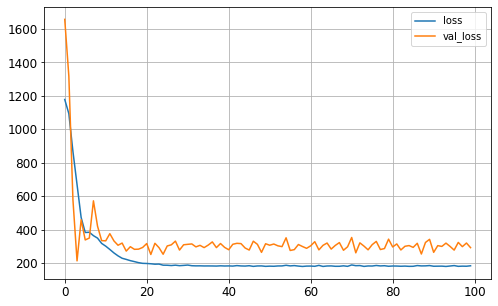

In [13]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.show()

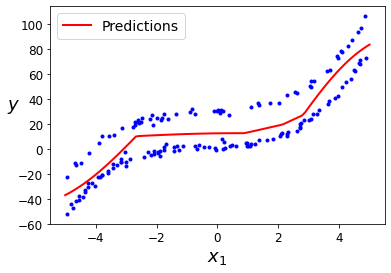

In [14]:
X_new = np.linspace(-5, 5, 100).reshape(100, 1)
y_new = model.predict(X_new)
#
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
# plt.axis([-3, 3, 0, 10])
plt.show()

# Regression by Classification

In [15]:
class num2grid_np():
    def __init__(self, units, x_min=-10, x_max=10, sigma=1.0):
        self.units = units
        self.x_min = x_min
        self.x_max = x_max
        self.sigma = sigma
        self.sigma2 = self.sigma**2
        self.x_grid = np.linspace(self.x_min, self.x_max, self.units, endpoint=True)
        print("self.x_grid = %s" % str(self.x_grid))
        
    def convert(self, X):
        gauss_grid = np.exp( -(self.x_grid - X)**2 / (2.0*self.sigma2) )
        if len(gauss_grid.shape) == 1:
            gauss_grid = gauss_grid.reshape([1,-1])
        grid_sum = np.sum(gauss_grid, axis=1, keepdims=True)
        gauss_grid = gauss_grid / grid_sum
        return gauss_grid
    
    def inv_convert(self, grid):
        if len(grid.shape) == 1:
            grid = grid.reshape([1,-1])
        grid_sum = np.sum(grid, axis=1)
#         print(grid_sum)
        exp_num = np.sum((self.x_grid * grid), axis=1) / grid_sum # element-wise
        return exp_num

In [155]:
# class_num = 50 # 10
# n2g = num2grid_np(class_num, x_min=-100.0, x_max=100.0, sigma=20.0) 
class_num = 50
n2g = num2grid_np(class_num, x_min=-100.0, x_max=100.0, sigma=5.0) 

self.x_grid = [-100.          -95.91836735  -91.83673469  -87.75510204  -83.67346939
  -79.59183673  -75.51020408  -71.42857143  -67.34693878  -63.26530612
  -59.18367347  -55.10204082  -51.02040816  -46.93877551  -42.85714286
  -38.7755102   -34.69387755  -30.6122449   -26.53061224  -22.44897959
  -18.36734694  -14.28571429  -10.20408163   -6.12244898   -2.04081633
    2.04081633    6.12244898   10.20408163   14.28571429   18.36734694
   22.44897959   26.53061224   30.6122449    34.69387755   38.7755102
   42.85714286   46.93877551   51.02040816   55.10204082   59.18367347
   63.26530612   67.34693878   71.42857143   75.51020408   79.59183673
   83.67346939   87.75510204   91.83673469   95.91836735  100.        ]


In [156]:
grid_1 = n2g.convert(-1.2)
print(grid_1)

[[5.32087956e-86 3.86113319e-79 1.43892139e-72 2.75391345e-66
  2.70678923e-60 1.36631087e-54 3.54189384e-49 4.71533431e-44
  3.22389115e-39 1.13198112e-34 2.04121584e-30 1.89029511e-26
  8.99003166e-23 2.19575442e-19 2.75421121e-16 1.77419623e-13
  5.86944439e-11 9.97202289e-09 8.70082579e-07 3.89877895e-05
  8.97196734e-04 1.06032179e-02 6.43544562e-02 2.00590561e-01
  3.21094817e-01 2.63965415e-01 1.11442718e-01 2.41628020e-02
  2.69050515e-03 1.53854886e-04 4.51834812e-06 6.81457879e-08
  5.27824177e-10 2.09957055e-12 4.28906472e-15 4.49972175e-18
  2.42437419e-21 6.70817796e-25 9.53235992e-29 6.95644285e-33
  2.60714354e-37 5.01803398e-42 4.96013143e-47 2.51793030e-52
  6.56425064e-58 8.78855631e-64 6.04283668e-70 2.13380686e-76
  3.86954844e-83 3.60376450e-90]]


In [157]:
n2g.inv_convert(grid_1)

array([-1.2])

### Convert the labels to grid (pre-processing)

In [158]:
y_train_grid = n2g.convert(y_train)
y_valid_grid = n2g.convert(y_valid)

In [159]:
print(y_train_grid.shape)
print(y_valid_grid.shape)

(160, 50)
(40, 50)


In [160]:
model = keras.models.Sequential([
#     keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    num2grid(5,x_min=-10, x_max=10, sigma=3.0, input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(class_num, activation="softmax"),
])

optimizer = keras.optimizers.SGD(lr=0.1, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=optimizer)

/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [161]:
history = model.fit(X_train, y_train_grid, epochs=100,
                    validation_data=(X_valid, y_valid_grid))

Epoch 1/100
5/5 [==============================] - 1s 112ms/step - loss: 3.8790 - val_loss: 3.7619
Epoch 2/100
5/5 [==============================] - 0s 36ms/step - loss: 3.7083 - val_loss: 3.5023
Epoch 3/100
5/5 [==============================] - 0s 41ms/step - loss: 3.4584 - val_loss: 3.1805
Epoch 4/100
5/5 [==============================] - 0s 29ms/step - loss: 3.2550 - val_loss: 3.0352
Epoch 5/100
5/5 [==============================] - 0s 48ms/step - loss: 3.1847 - val_loss: 2.9422
Epoch 6/100
5/5 [==============================] - 0s 33ms/step - loss: 3.0806 - val_loss: 2.8732
Epoch 7/100
5/5 [==============================] - 0s 50ms/step - loss: 3.0036 - val_loss: 2.8269
Epoch 8/100
5/5 [==============================] - 0s 50ms/step - loss: 2.9330 - val_loss: 2.7520
Epoch 9/100
5/5 [==============================] - 0s 39ms/step - loss: 2.8568 - val_loss: 2.6896
Epoch 10/100
5/5 [==============================] - 0s 37ms/step - loss: 2.7925 - val_loss: 2.6369
Epoch 11/100
5/5 [

5/5 [==============================] - 0s 49ms/step - loss: 2.3060 - val_loss: 2.4161
Epoch 84/100
5/5 [==============================] - 0s 48ms/step - loss: 2.2912 - val_loss: 2.4440
Epoch 85/100
5/5 [==============================] - 0s 44ms/step - loss: 2.2992 - val_loss: 2.4127
Epoch 86/100
5/5 [==============================] - 0s 63ms/step - loss: 2.2973 - val_loss: 2.5094
Epoch 87/100
5/5 [==============================] - 0s 55ms/step - loss: 2.2979 - val_loss: 2.3877
Epoch 88/100
5/5 [==============================] - 0s 62ms/step - loss: 2.3036 - val_loss: 2.4474
Epoch 89/100
5/5 [==============================] - 0s 41ms/step - loss: 2.2937 - val_loss: 2.3956
Epoch 90/100
5/5 [==============================] - 0s 52ms/step - loss: 2.2901 - val_loss: 2.4594
Epoch 91/100
5/5 [==============================] - 0s 43ms/step - loss: 2.2823 - val_loss: 2.4048
Epoch 92/100
5/5 [==============================] - 0s 42ms/step - loss: 2.2825 - val_loss: 2.3662
Epoch 93/100
5/5 [=====

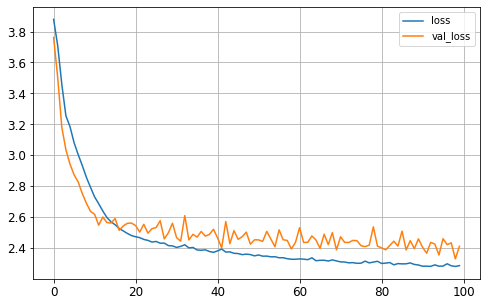

In [162]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.show()

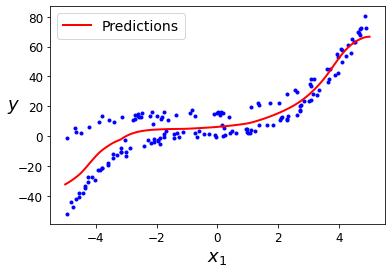

In [163]:
X_new = np.linspace(-5, 5, 100).reshape(100, 1)
y_new_proba = model.predict(X_new)
y_new = n2g.inv_convert(y_new_proba)
#
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
# plt.axis([-3, 3, 0, 10])
plt.show()

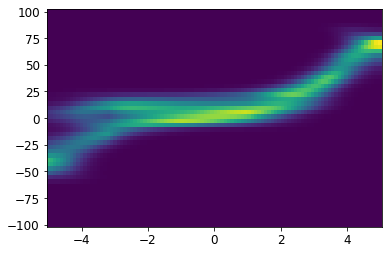

In [177]:
xv, yv = np.meshgrid(X_new, np.linspace(n2g.x_min, n2g.x_max, n2g.units))
# print(xv)
# print(yv)
plt.pcolormesh(xv, yv, y_new_proba.T, shading="nearest")